In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fd = pd.read_csv('Social_Network_Ads.csv')

In [3]:
fd.sample(5)

,Age,EstimatedSalary,Purchased
375,46,32000,1
76,18,52000,0
238,46,82000,0
362,47,50000,1
385,56,60000,1


Train test Split

In [4]:
from sklearn.model_selection import train_test_split
x=fd.drop('Purchased', axis=1)  #features
y=fd['Purchased']               #target_varibles
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape, y_train.shape

((280, 2), (120, 2), (280,))

In [5]:
new_y = fd.iloc[:,2:]

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sca = MinMaxScaler()
y_train_reshape = y_train.values.reshape(-1,1)
y_test_reshape = y_test.values.reshape(-1,1)

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)
sca.fit(y_train_reshape)

# transform train and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = sca.transform(y_train_reshape)
y_test_scaled = sca.transform(y_test_reshape)

In [7]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)
y_train_scaled = pd.DataFrame(y_train_scaled, columns=new_y.columns)
y_test_scaled = pd.DataFrame(y_test_scaled, columns=new_y.columns)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
Lr = LogisticRegression()
Lr_scaled = LogisticRegression()

In [10]:
Lr.fit(x_train, y_train)
Lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [11]:
y_pred=Lr.predict(x_test)
y_pred_scaled=Lr.predict(x_test_scaled)

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.6583333333333333


STANDARD SCALAR

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sca = StandardScaler()
y_train_reshape = y_train.values.reshape(-1,1)
y_test_reshape = y_test.values.reshape(-1,1)
# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)
sca.fit(y_train_reshape)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
y_train_scaled = sca.transform(y_train_reshape)
y_test_scaled = sca.transform(y_test_reshape)

In [15]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)
y_test_scaled = pd.DataFrame(y_train_reshape, columns=new_y.columns)
y_train_scaled = pd.DataFrame(y_test_reshape, columns=new_y.columns)

Effect OF Scaling

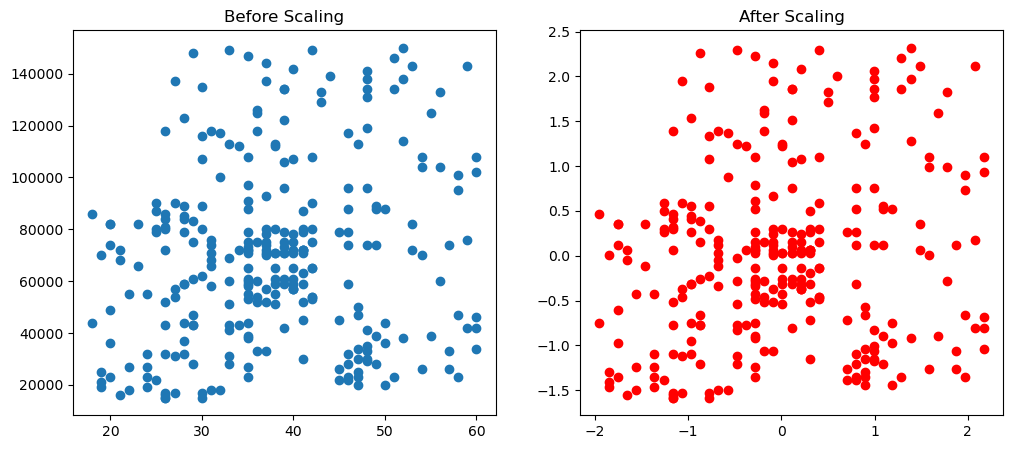

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

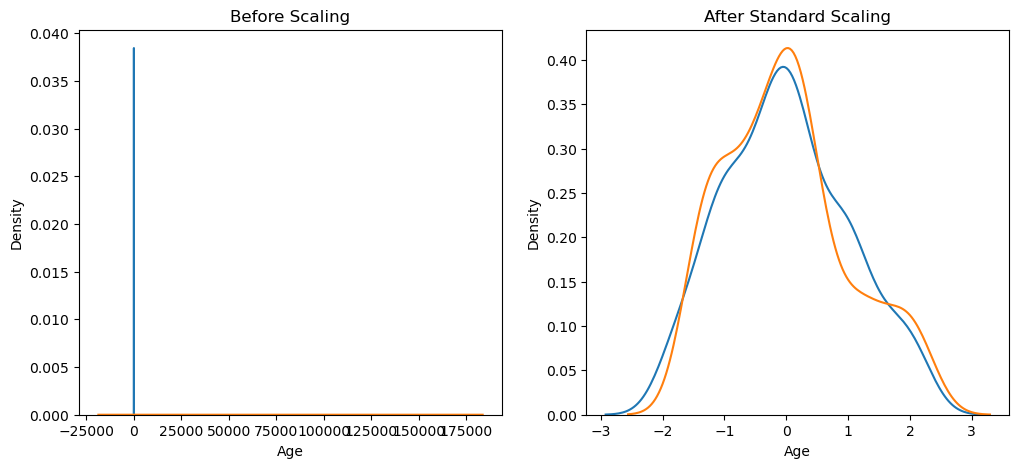

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Comparison of Distribution

C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Atharva\ANACONDAS\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

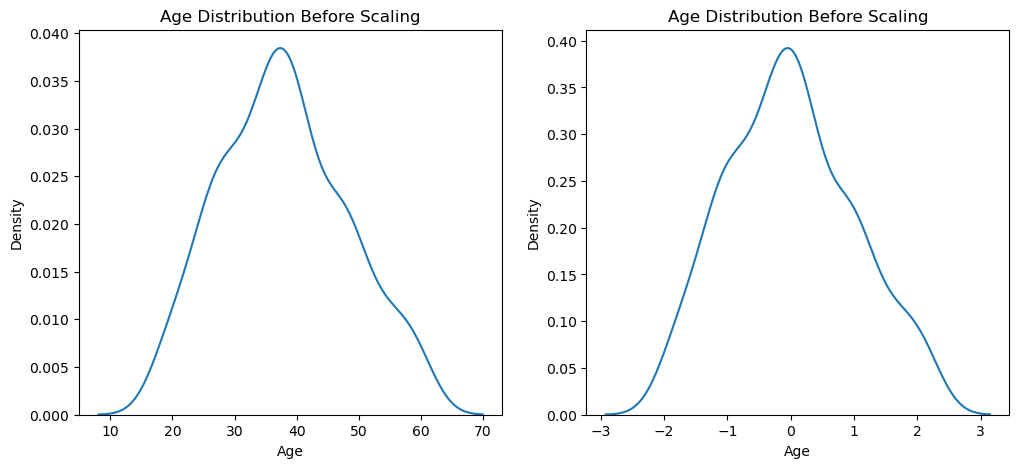

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

Why Scaling is important??

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [21]:
x_train,y_train, y_train_scaled, x_train_scaled

(     Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
 92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64,
      Purchased
 0            0
 1            0
 2            0
 3            0
 4            0
 ..         ...
 115          0
 116          1
 117          0
 118          0
 119          1
 
 [120 rows x 1 columns],
           Age  EstimatedSalary
 0   -1.163172        -1.584970
 1    2.170181         0.930987
 2    0.013305         1.220177
 3    0.209385         1.075582
 4    0.405465        -0.486047
 ..        ...              ...
 275  0.993704        -1.151185
 276 -0.869053     

In [22]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)
y_pred = pd.DataFrame(y_pred)
# y_pred

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


Scaling using Robust scaler

In [26]:
 from sklearn.preprocessing import RobustScaler

In [27]:
rs = RobustScaler()

In [28]:
x_train_scaled = rs.fit_transform(x_train)
x_test_scaled = rs.transform(x_test)

In [29]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)

In [30]:
# lets import the model
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()
Lr_scaled = LogisticRegression()

# fit the model on training data
Lr.fit(x_train, y_train)
Lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
# lets do some preds
y_pred = Lr.predict(x_test)
# pd.DataFrame(y_pred.reshape(-1,1))
y_pred_scaled = Lr_scaled.predict(x_test_scaled)
# pd.DataFrame(y_pred_scaled.reshape(-1,1))

In [32]:
# lets check the accuracy
from sklearn.metrics import accuracy_score

print("ACTUAL:  ", accuracy_score(y_test,y_pred))
print("SCALED:  ", accuracy_score(y_test,y_pred_scaled))

ACTUAL:   0.6583333333333333
SCALED:   0.875


Scaling using MaxAbsScaler

In [33]:
from sklearn.preprocessing import MaxAbsScaler

mbs = MaxAbsScaler()

x_train_scaled = mbs.fit_transform(x_train)
x_test_scaled = mbs.transform(x_test)

In [34]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)
# x_train_scaled,x_test_scaled

In [35]:
LR = LogisticRegression()
LR_scaled = LogisticRegression()

LR.fit(x_train,y_train)
LR_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [36]:
y_pred = LR.predict(x_test)
y_pred_scaled = LR_scaled.predict(x_test_scaled)

In [37]:
print("ACTUAL:  ", accuracy_score(y_test,y_pred))
print("SCALED:  ", accuracy_score(y_test,y_pred_scaled))

ACTUAL:   0.6583333333333333
SCALED:   0.8416666666666667
